In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools 

In [ ]:
cry = pd.read_csv("cry_final.feats.txt")
laugh = pd.read_csv("laugh_final.feats.txt")
neutral = pd.read_csv("neutral_final.feats.txt")

In [2]:
for df in [cry, laugh, neutral]:
    print(df.shape)

(21, 76)
(18, 76)
(25, 76)


In [3]:
for df in [cry, laugh, neutral]:
    print(df.isnull().sum().sum())

0
0
0


U svakom df 75 kolona (5 statistickih vrednosti za svako od 15 obelezja) + klasifikaciono obelezje (cry/laugh/neutral). Jedan red = jedan audio uzorak, nad kojim su uzimani prozori sirine 25ms sa preklapanjem od 10ms i racunata su obelezja za svaki prozor, pa su na nivou celog auzio uzorka izracunate statisticke vrednosti tih obelezja. Nema nedostajucih vrednosti zbog same prirode uzorkovanja.

In [4]:
cry.head(5)

,f0_mean,f1_mean,f2_mean,mfc0_mean,mfc1_mean,mfc2_mean,mfc3_mean,mfc4_mean,mfc5_mean,mfc6_mean,...,mfc3_min,mfc4_min,mfc5_min,mfc6_min,mfc7_min,mfc8_min,mfc9_min,mfc10_min,mfc11_min,class
0,493.496927,1046.808982,2204.096641,273.425692,-385.176907,13.233236,-16.323305,-85.382541,-21.335144,27.985574,...,-112.831616,-137.948921,-111.392844,-62.612035,-97.961674,-68.204134,-30.545093,-79.605147,-73.681360,cry
1,518.595048,1054.663269,2069.008657,342.903687,-383.873679,-60.224792,5.133660,-73.684536,-11.528305,39.623514,...,-65.352775,-138.391804,-70.845007,-49.102918,-108.051657,-47.973782,-16.941834,-136.428832,-103.451307,cry
2,559.767147,1036.808085,2168.791583,333.502586,-364.428428,27.464328,66.814604,-59.744294,-7.193629,46.520110,...,12.510600,-105.739292,-72.144848,-23.326089,-145.225245,-87.537134,1.320112,-85.993270,-95.266574,cry
3,14.244079,1054.610716,2110.414899,323.562020,-339.778412,39.494513,-27.096976,-51.467880,3.197604,18.664983,...,-112.122741,-113.201038,-69.536053,-32.457737,-110.859332,-23.196866,-33.159487,-88.097043,0.756846,cry
4,487.472217,1126.730109,1828.994648,326.230846,-424.982339,-142.127193,28.758255,-114.533159,13.931460,45.197368,...,-43.476544,-195.099200,-117.466815,-50.317020,-127.476304,-72.427717,-34.064523,-110.771785,-43.234747,cry


In [5]:
laugh.head(5)

,f0_mean,f1_mean,f2_mean,mfc0_mean,mfc1_mean,mfc2_mean,mfc3_mean,mfc4_mean,mfc5_mean,mfc6_mean,...,mfc3_min,mfc4_min,mfc5_min,mfc6_min,mfc7_min,mfc8_min,mfc9_min,mfc10_min,mfc11_min,class
0,425.371055,763.848117,2019.238544,215.534480,-78.380861,-40.965680,27.429967,-55.666667,-63.538487,-12.162613,...,-25.647159,-157.197602,-187.825121,-84.308069,-150.108875,-80.788718,-21.983051,-25.267507,-65.391836,laugh
1,178.252800,1013.017813,1974.021687,169.203395,-132.871837,-71.739258,-1.214263,-80.811710,-35.953331,5.541381,...,-57.780451,-215.903359,-131.041438,-29.669343,-114.549840,-104.479802,-35.550627,-103.449052,-148.201474,laugh
2,366.534965,1414.217685,1861.772894,343.909497,-428.025447,-101.474307,29.461499,-149.016071,16.460214,28.916641,...,-53.545325,-230.403207,-33.079550,-27.811630,-162.534817,-48.891735,-73.739998,-133.701271,-26.348050,laugh
3,440.417838,980.750946,1588.049882,350.474039,-201.523284,-117.706628,0.176604,-74.714937,8.287893,53.580715,...,-83.818081,-170.951155,-110.941155,-8.821175,-80.284148,-136.449384,-110.407504,-110.738791,-157.803615,laugh
4,408.161878,868.223878,1722.217605,382.060466,-190.377259,-79.368846,16.683749,-86.290871,1.563411,20.632787,...,-64.175290,-147.578934,-64.676093,-67.653283,-127.321646,-92.908180,-104.826635,-118.922838,-89.890742,laugh


In [6]:
neutral.head(5)

,f0_mean,f1_mean,f2_mean,mfc0_mean,mfc1_mean,mfc2_mean,mfc3_mean,mfc4_mean,mfc5_mean,mfc6_mean,...,mfc3_min,mfc4_min,mfc5_min,mfc6_min,mfc7_min,mfc8_min,mfc9_min,mfc10_min,mfc11_min,class
0,371.271959,682.233900,1753.195160,336.647935,-66.643184,9.206912,-4.406490,-85.897439,-15.504547,-4.728252,...,-61.766724,-149.604095,-72.321891,-40.911137,-159.253303,-59.259831,-63.818878,-51.590774,-22.386252,neutral
1,254.588002,950.386363,1769.792565,435.878480,-223.228390,-111.297620,-40.691510,-140.940420,11.722912,28.743702,...,-188.981550,-228.798352,-84.649187,-87.798236,-192.751073,-87.326331,-56.567790,-114.577876,-74.544995,neutral
2,304.975495,953.166127,1909.391465,484.340009,-277.290461,-112.874435,50.649094,-130.006829,-60.372476,41.413026,...,-11.585639,-203.383251,-131.373466,-29.678366,-148.772891,-99.494214,-13.615783,-102.679461,-162.524351,neutral
3,304.253201,1299.535846,1886.109116,456.273388,-383.480056,-155.572021,6.475728,-94.255539,16.965493,32.087290,...,-50.947864,-130.413328,-50.604971,-27.608948,-124.869246,-86.596855,-46.317193,-129.569535,-79.483669,neutral
4,280.489858,634.886043,1672.799985,463.612077,-138.936669,-15.542711,-4.677180,-116.464750,-23.257467,-45.394059,...,-73.197889,-159.417390,-107.020038,-124.017354,-128.401449,-126.735488,-96.554094,-44.609117,-0.762572,neutral


In [7]:
df.columns.values.tolist()

['f0_mean',
 'f1_mean',
 'f2_mean',
 'mfc0_mean',
 'mfc1_mean',
 'mfc2_mean',
 'mfc3_mean',
 'mfc4_mean',
 'mfc5_mean',
 'mfc6_mean',
 'mfc7_mean',
 'mfc8_mean',
 'mfc9_mean',
 'mfc10_mean',
 'mfc11_mean',
 'f0_std',
 'f1_std',
 'f2_std',
 'mfc0_std',
 'mfc1_std',
 'mfc2_std',
 'mfc3_std',
 'mfc4_std',
 'mfc5_std',
 'mfc6_std',
 'mfc7_std',
 'mfc8_std',
 'mfc9_std',
 'mfc10_std',
 'mfc11_std',
 'f0_max',
 'f1_max',
 'f2_max',
 'mfc0_max',
 'mfc1_max',
 'mfc2_max',
 'mfc3_max',
 'mfc4_max',
 'mfc5_max',
 'mfc6_max',
 'mfc7_max',
 'mfc8_max',
 'mfc9_max',
 'mfc10_max',
 'mfc11_max',
 'f0_median',
 'f1_median',
 'f2_median',
 'mfc0_median',
 'mfc1_median',
 'mfc2_median',
 'mfc3_median',
 'mfc4_median',
 'mfc5_median',
 'mfc6_median',
 'mfc7_median',
 'mfc8_median',
 'mfc9_median',
 'mfc10_median',
 'mfc11_median',
 'f0_min',
 'f1_min',
 'f2_min',
 'mfc0_min',
 'mfc1_min',
 'mfc2_min',
 'mfc3_min',
 'mfc4_min',
 'mfc5_min',
 'mfc6_min',
 'mfc7_min',
 'mfc8_min',
 'mfc9_min',
 'mfc10_min',

Ovde plotujem podatke iz baze - srednju vr, mx-min, st.dev obelezja iz baze (frekvencije, formanta i koeficijenata), 
ali bukv nema nikakvih pravilnosti :)

In [44]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

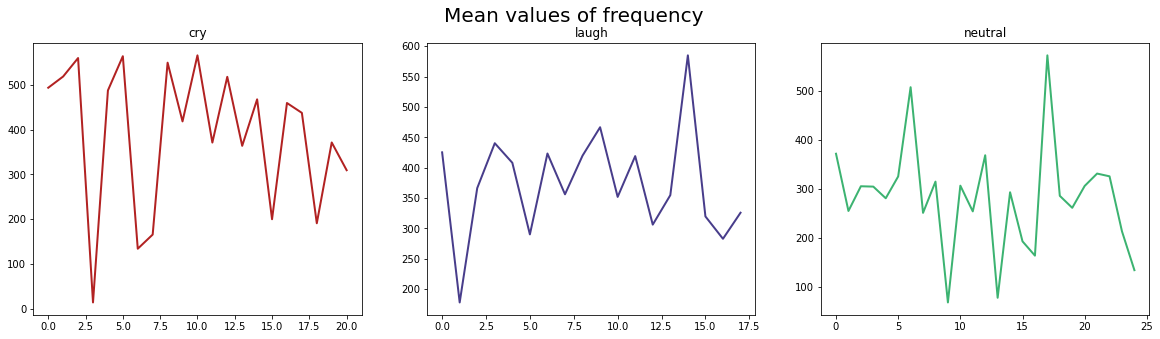

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Mean values of frequency', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
colors = ['firebrick', 'darkslateblue', 'mediumseagreen']

for df, ax, col in zip(dataframe, axes, colors):
    ax.plot(df[df.columns[0]], linewidth=2, color = col)
    ax.title.set_text(get_df_name(df))


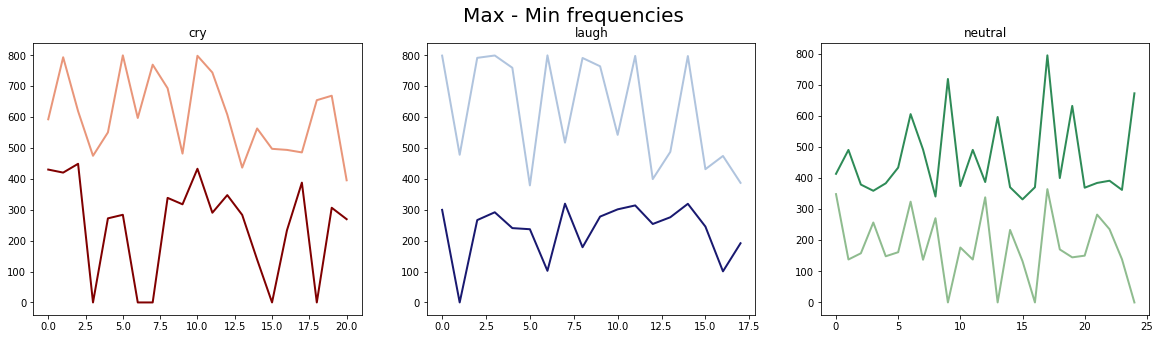

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Max - Min frequencies', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
color1 = ["darksalmon","lightsteelblue","seagreen"]
color2 = ["maroon","midnightblue","darkseagreen"] 

for df, ax, col1, col2 in zip(dataframe, axes, color1, color2):
    ax.plot(df[df.columns[30]], linewidth=2, color = col1)
    ax.plot(df[df.columns[60]], linewidth=2, color = col2)
    ax.title.set_text(get_df_name(df))

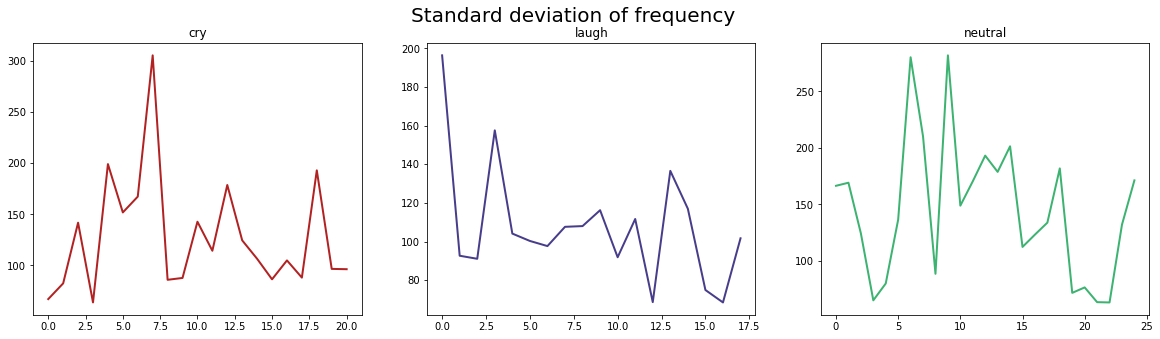

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Standard deviation of frequency', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
colors = ['firebrick', 'darkslateblue', 'mediumseagreen']

for df, ax, col in zip(dataframe, axes, colors):
    ax.plot(df[df.columns[16]], linewidth=2, color = col)
    ax.title.set_text(get_df_name(df))

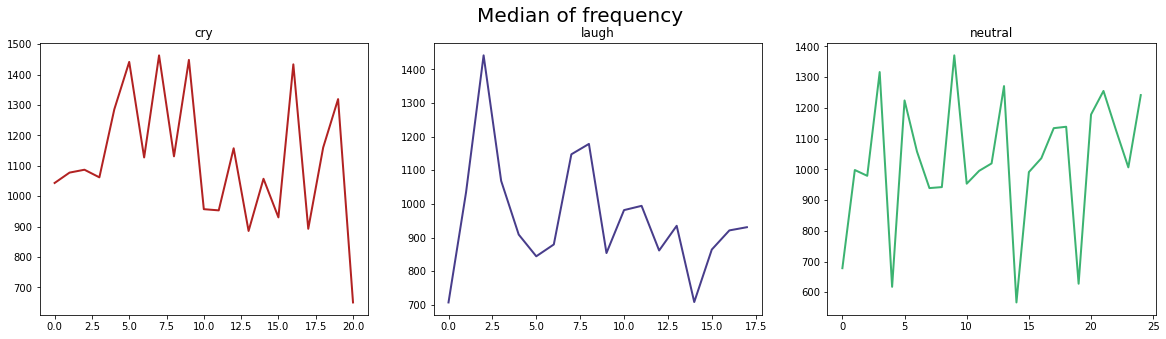

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Median of frequency', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
colors = ['firebrick', 'darkslateblue', 'mediumseagreen']

for df, ax, col in zip(dataframe, axes, colors):
    ax.plot(df[df.columns[46]], linewidth=2, color = col)
    ax.title.set_text(get_df_name(df))

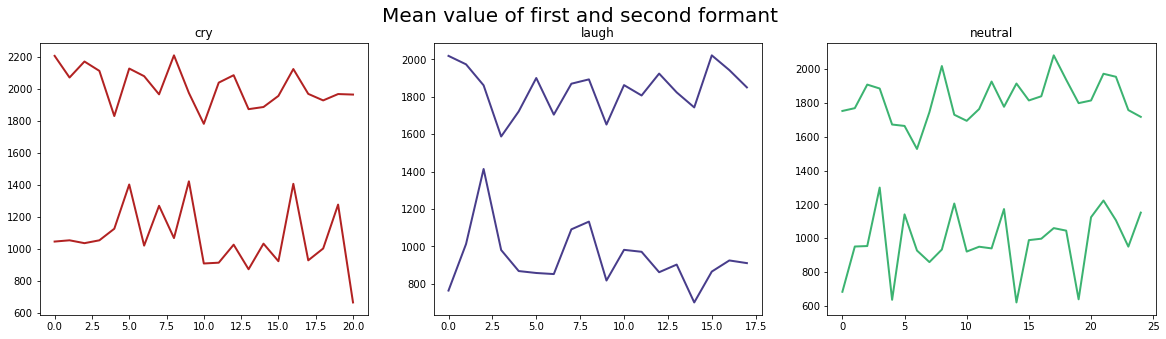

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Mean value of first and second formant', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
colors = ['firebrick', 'darkslateblue', 'mediumseagreen']

for df, ax, col in zip(dataframe, axes, colors):
    ax.plot(df[df.columns[1]], linewidth=2, color = col)
    ax.plot(df[df.columns[2]], linewidth=2, color = col)
    ax.title.set_text(get_df_name(df))

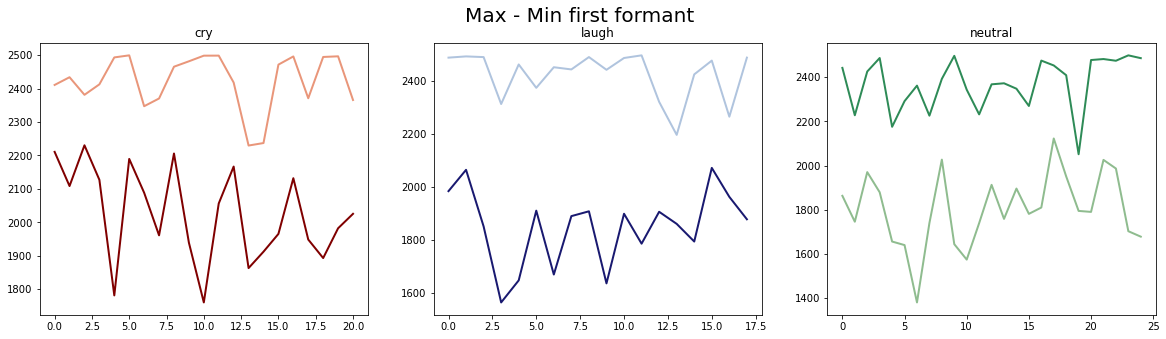

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Max - Min first formant', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
color1 = ["darksalmon","lightsteelblue","seagreen"]
color2 = ["maroon","midnightblue","darkseagreen"] 

for df, ax, col1, col2 in zip(dataframe, axes, color1, color2):
    ax.plot(df[df.columns[32]], linewidth=2, color = col1)
    ax.plot(df[df.columns[47]], linewidth=2, color = col2)
    ax.title.set_text(get_df_name(df))

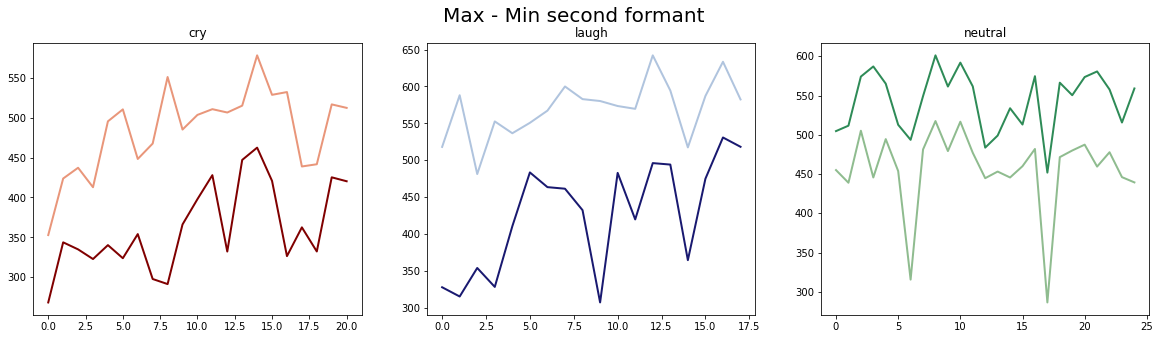

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Max - Min second formant', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
color1 = ["darksalmon","lightsteelblue","seagreen"]
color2 = ["maroon","midnightblue","darkseagreen"] 

for df, ax, col1, col2 in zip(dataframe, axes, color1, color2):
    ax.plot(df[df.columns[33]], linewidth=2, color = col1)
    ax.plot(df[df.columns[48]], linewidth=2, color = col2)
    ax.title.set_text(get_df_name(df))

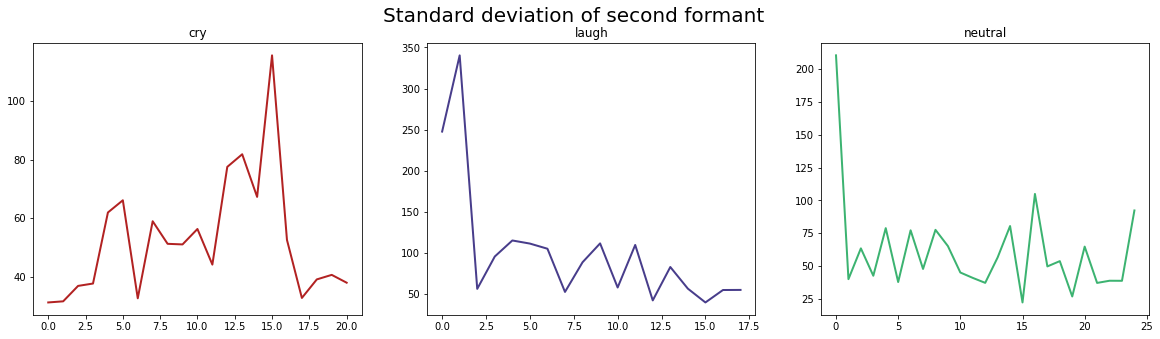

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Standard deviation of second formant', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
colors = ['firebrick', 'darkslateblue', 'mediumseagreen']

for df, ax, col in zip(dataframe, axes, colors):
    ax.plot(df[df.columns[18]], linewidth=2, color = col)
    ax.title.set_text(get_df_name(df))

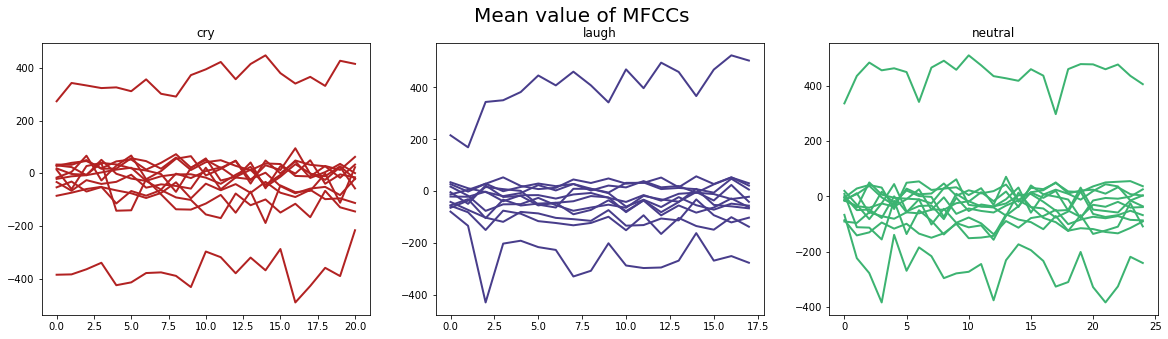

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Mean value of MFCCs', fontsize = 20)

dataframe = [cry, laugh, neutral]
axes = [ax1, ax2, ax3]
colors = ['firebrick', 'darkslateblue', 'mediumseagreen']

for df, ax, col in zip(dataframe, axes, colors):
    ax.plot(df[["mfc0_mean", "mfc1_mean", "mfc2_mean","mfc3_mean", "mfc4_mean", "mfc5_mean", "mfc6_mean",
                "mfc7_mean", "mfc8_mean", "mfc9_mean", "mfc10_mean", "mfc11_mean"]], linewidth=2, color = col)
    ax.title.set_text(get_df_name(df))